# Predict Wind Turbine Outputs from Erosion Simulation Model

Note, this is the old erosion model.  Also, we only have 88 tests, and the points are not from a LHC design, so they might not fill the space.  First, load in the data table and explore the outputs.

In [1]:
import pandas as pd

data = pd.read_table('Morris_Test_SidebySideData_withErosion.txt',delimiter=',')

In [2]:
data.head()

,WindHubAngXY,WindHubVelMag,WindHubVelX,BldPitch1,BldPitch2,BldPitch3,YawPzn,LSShftFxa,LSShftFya,LSShftFza,...,ErB2R3,ErB2R4,ErB2R5,ErB2R6,ErB3R1,ErB3R2,ErB3R3,ErB3R4,ErB3R5,ErB3R6
0,-30,4.00,3.464,0.0,0.0,0.0,-0.001490,161.118517,83.386097,-48.809254,...,0.666667,0.666667,1.0,1.0,0.0,1.0,1.0,0.666667,0.0,1.0
1,-30,4.00,3.464,0.0,0.0,0.0,-0.001505,161.044074,83.522560,-47.384139,...,0.000000,0.666667,1.0,1.0,0.0,1.0,1.0,0.666667,0.0,1.0
2,-30,4.00,3.464,0.0,0.0,0.0,-0.001680,162.653322,19.044742,-93.540500,...,0.000000,0.666667,1.0,1.0,0.0,1.0,1.0,0.666667,0.0,1.0
3,-30,4.00,3.464,0.0,0.0,0.0,-0.001664,163.346886,-20.866586,-92.148614,...,0.000000,0.666667,1.0,1.0,0.0,1.0,1.0,0.666667,0.0,1.0
4,-30,17.33,15.010,0.0,0.0,0.0,-0.006866,740.985670,-24.430691,-6.723136,...,0.000000,0.666667,1.0,1.0,0.0,1.0,1.0,0.666667,0.0,1.0


Now, we should try to predict one of the outputs given the experiment inputs.  For the first test, we will use as the experiment inputs: 
- windhubangle
- windhubvelocity
- airdensity

We will try to predict generator power.

In [3]:
column_names = data.columns

In [61]:
print(column_names[3:15])

Index(['BldPitch1', 'BldPitch2', 'BldPitch3', 'YawPzn', 'LSShftFxa',
       'LSShftFya', 'LSShftFza', 'LSShftMxa', 'LSSTipMya', 'LSSTipMza',
       'LSSGagMya', 'LSSGagMza'],
      dtype='object')


- The index for **generator power** is 263

- The index for wind angle is 0
- The index for wind velocity is 2
- The index for air density is 531

In [62]:
import numpy as np
inputs = np.zeros((88,3))
bigarray = data.to_numpy()
inputs[:,0] = bigarray[:,0]
inputs[:,1] = bigarray[:,1]
inputs[:,2] = bigarray[:,531]

outputs = bigarray[:,263]
print(outputs)

[61.1788710685274 59.8543782545303 59.9087877525516 60.0797333888773
 4383.22370339513 4800.78358675276 4295.07685898771 4999.96271610081
 5000.00083315976 4999.99187669236 4999.96271610081 4999.99041866278
 4999.99708394085 4999.92855655072 4999.9189752135 4999.98583628411
 5000.00374921891 4999.96375755051 4999.97979587586 4999.99312643199
 4999.98937721308 4999.97146427828 4999.95375963341 4999.98666944387
 4999.97979587586 5000.02124557384 5000.0320766507 5000.06623620079
 1451.29452197459 1442.59508435743 1607.68943970006 1503.6386169548
 1663.67235992502 1952.08831493439 2148.06456988127 2025.49573005624
 1953.11268485732 2354.08623203499 2333.47865028119 2507.34180379088
 2481.69214746928 2649.58342012081 2573.90939387628 2898.26640283274
 4999.99687565091 116.45596750677 114.816267444283 116.809518850239
 116.033722141221 107.362745261404 108.358225369715 109.921682982712
 109.348052489065 107.774888564882 109.59189752135 116.524078317017
 94.6137158925224 95.2807040199959 95.1

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# We will scale the inputs before trying to predict the outputs for best results;
# But in order to avoid data leaks, first we will split the data, then scale the training data
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.1)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train) # Transform the training data
X_test_sc = scaler.transform(X_test) # Use the transformer fit on training data for testing

# Now that the data is scaled, we can proceed to try to fit a GPE
# We will evaluate it on a scatter diagram, a QuantileQuantile plot, 
# and calculate the RMSE and the correlation coefficient

The upper bounds of the range parameters are 420041.2 414315.7 418357.7 
The initial values of range parameters are 8400.824 8286.314 8367.153 
Start of the optimization  1  : 
The number of iterations is  55 
 The value of the  marginal posterior  function is  -664.5988 
 Optimized range parameters are 3.709355 0.6917703 18.0968 
 Optimized nugget parameter is 0 
 Convergence:  FALSE 
The initial values of range parameters are 0.8411038 0.8296388 0.8377326 
Start of the optimization  2  : 
The number of iterations is  100 
 The value of the  marginal posterior  function is  -658.5538 
 Optimized range parameters are 16.71126 0.700982 24.90487 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The initial values of range parameters are 0.003579514 0.0007347318 0.001556327 
Start of the optimization  3  : 
The number of iterations is  56 
 The value of the  marginal posterior  function is  -659.8532 
 Optimized range parameters are 10.20805 0.6006486 16.81285 
 Optimized nugget par

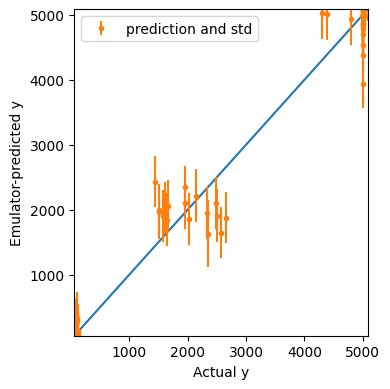

In [64]:
import numpy as np
from psimpy.emulator import ScalarGaSP
import matplotlib.pyplot as plt

# Select the model
emulator = ScalarGaSP(ndim=3,max_eval = 100,num_initial_values=8)

# Fit the model
emulator.train(design=X_train_sc, response=y_train)

# Validate the model
validation = emulator.loo_validate()

# Plot the validation
fig , ax = plt.subplots(figsize=(4,4))
y = y_train # for now y is made to be the training set
ax.set_xlabel('Actual y')
ax.set_ylabel('Emulator-predicted y')
ax.set_xlim(np.min(y)-1,np.max(y)+1)
ax.set_ylim(np.min(y)-1,np.max(y)+1)

_ = ax.plot([np.min(y)-1,np.max(y)+1], [np.min(y)-1,np.max(y)+1])
_ = ax.errorbar(y, validation[:,0], validation[:,1], fmt='.', linestyle='', label='prediction and std')
_ = plt.legend()
plt.tight_layout()

In [65]:
predicted_train = emulator.predict(X_train_sc)
predicted_test = emulator.predict(X_test_sc)

predict_train = predicted_train[:,0]
predict_test = predicted_test[:,0]

# Calculate R factor and mean-square-error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

error_training = np.sqrt(mean_squared_error(predict_train,y_train))
error_test = np.sqrt(mean_squared_error(predict_test,y_test))

corr_coef_train = r2_score(predict_train,y_train)
corr_coef_test = r2_score(predict_test,y_test)

print('RMSE training:',error_training)
print('RMSE testing:', error_test)
print('Correlation Coefficient training:',corr_coef_train)
print('Correlation Coefficient testing:', corr_coef_test)

RMSE training: 221.4370142763435
RMSE testing: 337.4405560284788
Correlation Coefficient training: 0.9893578165134823
Correlation Coefficient testing: 0.9730598778749899


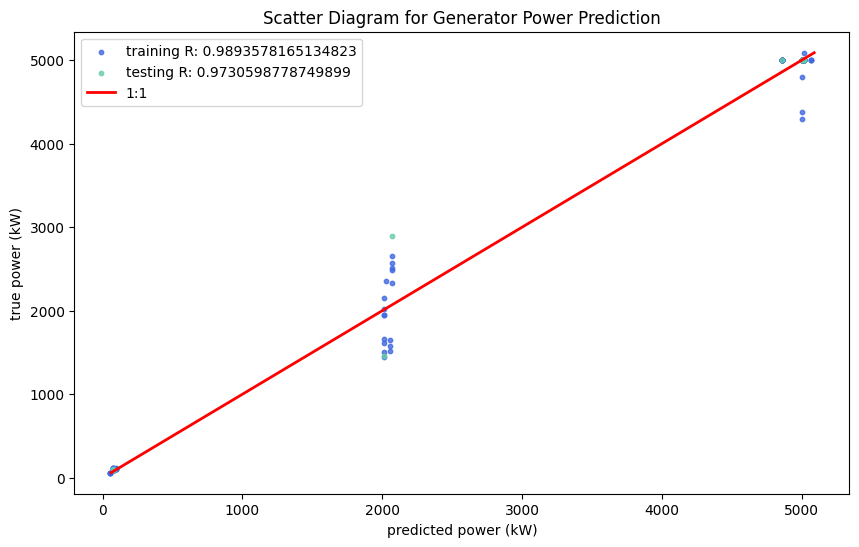

In [66]:
# Plot the Results
l1 = "training R: "+str(corr_coef_train)
l2 = "testing R: "+str(corr_coef_test)
fig, ax = plt.subplots(1,1,figsize=(10, 6))
ax.scatter(predict_train, y_train, color="royalblue", label=l1, s=10,alpha = 0.8)
ax.scatter(predict_test, y_test, color="mediumaquamarine", label=l2, s=10,alpha = 0.8)
ax.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color = "red", label = "1:1", linewidth=2)
ax.set_xlabel("predicted power (kW)")
ax.set_ylabel("true power (kW)")
ax.set_title("Scatter Diagram for Generator Power Prediction")
ax.legend()
plt.show()

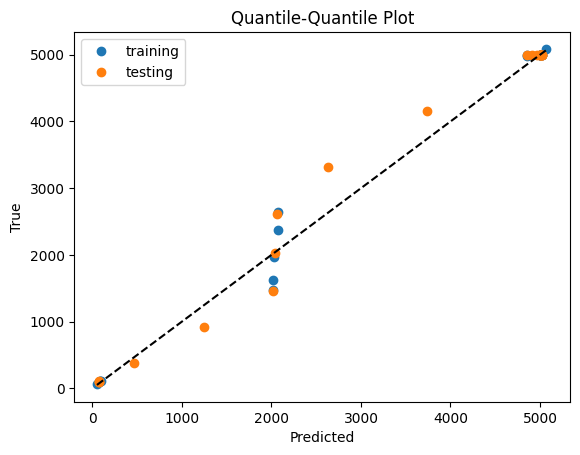

In [67]:
a = predict_train
b = y_train

c = predict_test
d = y_test

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)
qn_c = np.percentile(c, percs)
qn_d = np.percentile(d, percs)

plt.plot(qn_a,qn_b, ls="", marker="o",label = "training")
plt.plot(qn_c,qn_d, ls="", marker="o",label = "testing")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.title("Quantile-Quantile Plot")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()
plt.show()

This went fairly well.  Morris Method Points do not give us good prediction of power.  Let us try to give the GPE a better chance.
Add the erosion levels as well to the predictors.

The upper bounds of the range parameters are 12.80579 12.55768 12.57121 14.59892 9.963646 14.17227 11.99943 17.29148 10.0494 
The initial values of range parameters are 0.2561158 0.2511536 0.2514243 0.2919784 0.1992729 0.2834453 0.2399886 0.3458296 0.200988 
Start of the optimization  1  : 
The number of iterations is  40 
 The value of the  marginal posterior  function is  -675.188 
 Optimized range parameters are 12.80579 0.8601234 12.57121 14.59892 9.963646 14.17227 11.56367 17.29148 10.0494 
 Optimized nugget parameter is 0 
 Convergence:  FALSE 
The initial values of range parameters are 17.69486 17.35202 17.37072 20.17258 13.76762 19.58303 16.58064 23.89312 13.88612 
Start of the optimization  2  : 


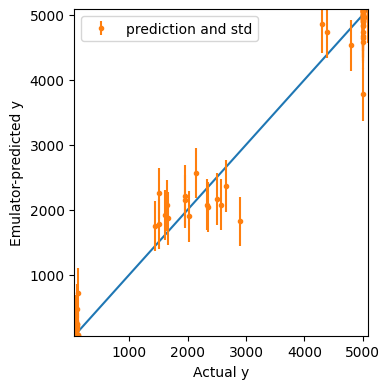

In [37]:
inputs = np.zeros((88,3+6))
bigarray = data.to_numpy()
inputs[:,0] = bigarray[:,0]
inputs[:,1] = bigarray[:,1]
inputs[:,2] = bigarray[:,531]
for i in range(6):
    inputs[:,3+i] = bigarray[:,539+i]


outputs = bigarray[:,263]

# We will scale the inputs before trying to predict the outputs for best results;
# But in order to avoid data leaks, first we will split the data, then scale the training data
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.1)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train) # Transform the training data
X_test_sc = scaler.transform(X_test) # Use the transformer fit on training data for testing

# Now that the data is scaled, we can proceed to try to fit a GPE
# We will evaluate it on a scatter diagram, a QuantileQuantile plot, 
# and calculate the RMSE and the correlation coefficient

# Select the model
emulator = ScalarGaSP(ndim=9,num_initial_values=2)

# Fit the model
emulator.train(design=X_train_sc, response=y_train)

# Validate the model
validation = emulator.loo_validate()

# Plot the validation
fig , ax = plt.subplots(figsize=(4,4))
y = y_train # for now y is made to be the training set
ax.set_xlabel('Actual y')
ax.set_ylabel('Emulator-predicted y')
ax.set_xlim(np.min(y)-1,np.max(y)+1)
ax.set_ylim(np.min(y)-1,np.max(y)+1)

_ = ax.plot([np.min(y)-1,np.max(y)+1], [np.min(y)-1,np.max(y)+1])
_ = ax.errorbar(y, validation[:,0], validation[:,1], fmt='.', linestyle='', label='prediction and std')
_ = plt.legend()
plt.tight_layout()

RMSE training: 183.11363042031812
RMSE testing: 283.8502496407288
Correlation Coefficient training: 0.9928435741409168
Correlation Coefficient testing: 0.979127617227545


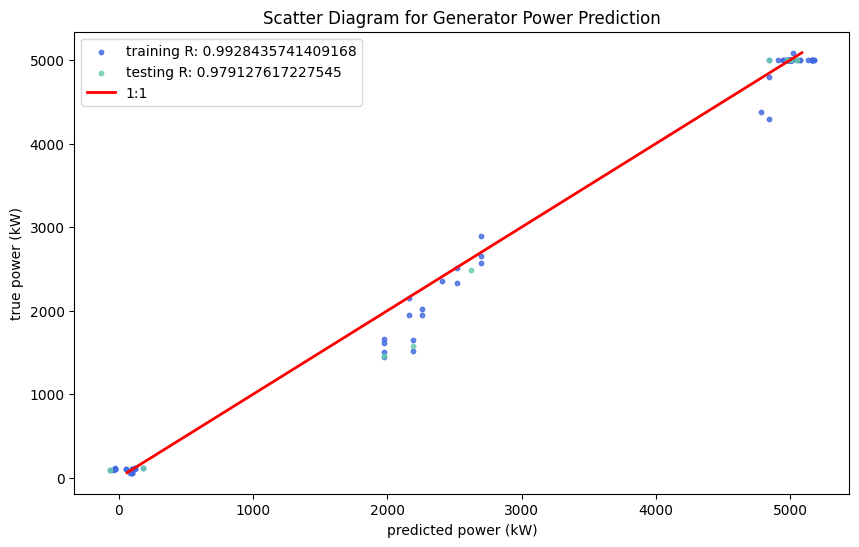

In [38]:
predicted_train = emulator.predict(X_train_sc)
predicted_test = emulator.predict(X_test_sc)

predict_train = predicted_train[:,0]
predict_test = predicted_test[:,0]

# Calculate R factor and mean-square-error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

error_training = np.sqrt(mean_squared_error(predict_train,y_train))
error_test = np.sqrt(mean_squared_error(predict_test,y_test))

corr_coef_train = r2_score(predict_train,y_train)
corr_coef_test = r2_score(predict_test,y_test)

print('RMSE training:',error_training)
print('RMSE testing:', error_test)
print('Correlation Coefficient training:',corr_coef_train)
print('Correlation Coefficient testing:', corr_coef_test)

# Plot the Results
l1 = "training R: "+str(corr_coef_train)
l2 = "testing R: "+str(corr_coef_test)
fig, ax = plt.subplots(1,1,figsize=(10, 6))
ax.scatter(predict_train, y_train, color="royalblue", label=l1, s=10,alpha = 0.8)
ax.scatter(predict_test, y_test, color="mediumaquamarine", label=l2, s=10,alpha = 0.8)
ax.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color = "red", label = "1:1", linewidth=2)
ax.set_xlabel("predicted power (kW)")
ax.set_ylabel("true power (kW)")
ax.set_title("Scatter Diagram for Generator Power Prediction")
ax.legend()
plt.show()

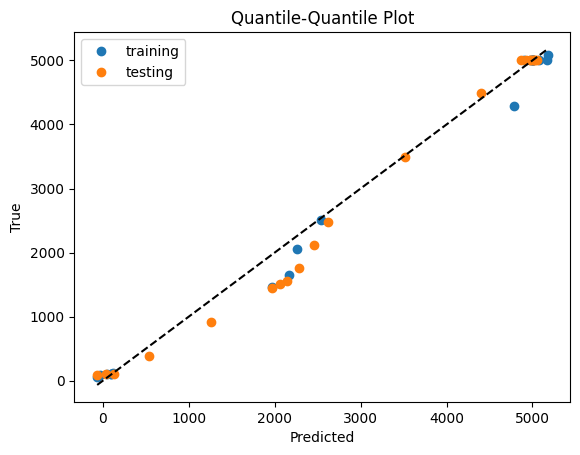

In [39]:
a = predict_train
b = y_train

c = predict_test
d = y_test

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)
qn_c = np.percentile(c, percs)
qn_d = np.percentile(d, percs)

plt.plot(qn_a,qn_b, ls="", marker="o",label = "training")
plt.plot(qn_c,qn_d, ls="", marker="o",label = "testing")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.title("Quantile-Quantile Plot")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()
plt.show()